# Movie Data Analysis

## Sources for definitions:

Summer movie season definition: https://datebook.sfchronicle.com/movies-tv/summer-movies-2020-the-season-of-the-blockbuster-is-now-the-season-of-uncertainty#:~:text=For%20the%20last%20two%20years,tracks%20box%20office%20revenue%20worldwide.
    

![title](img/id4.png)

Dump months definition: https://en.wikipedia.org/wiki/Dump_months

![title](img/HalloweenH20.png)

Oscar season Definition: https://en.wikipedia.org/wiki/Oscar_season#:~:text=Oscar%20season%20usually%20begins%20in,and%20dependent%20on%20the%20year

![title](img/TheKingsSpeech.png)

In [1]:
#John's Code Start's Here

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Load Data
TheData_df = pd.read_csv('DataFiles/FINAL_CLEANED_DF.csv')
Data = TheData_df

#Run .Head()
Data.head()

,Title,Domestic Release Date,Year Released (Domestic),Month Released (Domestic),Infl. Adj. Dom. Box Office,Domestic Box Office,Genre,Oscars Won,Number Oscars Won,Total Oscars Awarded in Year,Awards,Metascore,IMDB,Rotten Tomatoes,Rated,Director,Runtime,Theatrical Distributor,Country
0,Titanic,1997-12-19,1997,12,1240601558,659363944,Thriller/Suspense,Yes,11,24,Won 11 Oscars. Another 113 wins & 83 nominations.,75.0,7.8,89%,PG-13,James Cameron,194 min,Paramount Pictures,"USA, Mexico, Australia, Canada"
1,ET: The Extra-Terrestrial,1982-06-11,1982,6,1224582698,435110554,Drama,Yes,4,23,Won 4 Oscars. Another 48 wins & 35 nominations.,91.0,7.8,98%,PG,Steven Spielberg,115 min,Universal,USA
2,Star Wars Ep. VII: The Force Awakens,2015-12-18,2015,12,1006872847,936662225,Adventure,No,0,25,Nominated for 5 Oscars. Another 62 wins & 126 ...,80.0,7.9,93%,PG-13,J.J. Abrams,138 min,Walt Disney,USA
3,Avatar,2009-12-18,2009,12,899243135,760507625,Action,Yes,3,25,Won 3 Oscars. Another 86 wins & 129 nominations.,83.0,7.8,82%,PG-13,James Cameron,162 min,20th Century Fox,USA
4,Star Wars Ep. V: The Empire Strikes Back,1980-05-21,1980,5,880005730,290271960,Adventure,Yes,1,22,Won 1 Oscar. Another 24 wins & 20 nominations.,82.0,8.7,94%,PG,Irvin Kershner,124 min,20th Century Fox,USA


In [3]:
#Define Data Set Groups
d = {'Month Released (Domestic)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
     'Data Set': ['Winter Dump Months', 
                    'Winter Dump Months', 
                    'Other Months', 
                    'Other Months', 
                    'Summer Blockbusters',
                    'Summer Blockbusters',
                    'Summer Blockbusters',
                    'Summer Dump Months',
                    'Summer Dump Months',
                    'Other Months',
                    'Oscar Season',
                    'Oscar Season',
                   ]}
DataSets_df = pd.DataFrame(data=d)
DataSets_df

,Month Released (Domestic),Data Set
0,1,Winter Dump Months
1,2,Winter Dump Months
2,3,Other Months
3,4,Other Months
4,5,Summer Blockbusters
5,6,Summer Blockbusters
6,7,Summer Blockbusters
7,8,Summer Dump Months
8,9,Summer Dump Months
9,10,Other Months


In [4]:
SummData = pd.merge(Data, DataSets_df, 
                      how="left", on='Month Released (Domestic)')
SummData.head()

,Title,Domestic Release Date,Year Released (Domestic),Month Released (Domestic),Infl. Adj. Dom. Box Office,Domestic Box Office,Genre,Oscars Won,Number Oscars Won,Total Oscars Awarded in Year,Awards,Metascore,IMDB,Rotten Tomatoes,Rated,Director,Runtime,Theatrical Distributor,Country,Data Set
0,Titanic,1997-12-19,1997,12,1240601558,659363944,Thriller/Suspense,Yes,11,24,Won 11 Oscars. Another 113 wins & 83 nominations.,75.0,7.8,89%,PG-13,James Cameron,194 min,Paramount Pictures,"USA, Mexico, Australia, Canada",Oscar Season
1,ET: The Extra-Terrestrial,1982-06-11,1982,6,1224582698,435110554,Drama,Yes,4,23,Won 4 Oscars. Another 48 wins & 35 nominations.,91.0,7.8,98%,PG,Steven Spielberg,115 min,Universal,USA,Summer Blockbusters
2,Star Wars Ep. VII: The Force Awakens,2015-12-18,2015,12,1006872847,936662225,Adventure,No,0,25,Nominated for 5 Oscars. Another 62 wins & 126 ...,80.0,7.9,93%,PG-13,J.J. Abrams,138 min,Walt Disney,USA,Oscar Season
3,Avatar,2009-12-18,2009,12,899243135,760507625,Action,Yes,3,25,Won 3 Oscars. Another 86 wins & 129 nominations.,83.0,7.8,82%,PG-13,James Cameron,162 min,20th Century Fox,USA,Oscar Season
4,Star Wars Ep. V: The Empire Strikes Back,1980-05-21,1980,5,880005730,290271960,Adventure,Yes,1,22,Won 1 Oscar. Another 24 wins & 20 nominations.,82.0,8.7,94%,PG,Irvin Kershner,124 min,20th Century Fox,USA,Summer Blockbusters


In [5]:
Summary_df = SummData.groupby("Data Set").agg({'Title':'count', 
                                                'Infl. Adj. Dom. Box Office':'mean'#, 
                                                #'Oscars Won':'count' 
                                              })

Summary_df.head()

#include in final data?

,Title,Infl. Adj. Dom. Box Office
Data Set,,
Oscar Season,441,1.885711e+08
Other Months,275,1.516488e+08
Summer Blockbusters,594,2.116240e+08
Summer Dump Months,177,1.417845e+08
Winter Dump Months,113,1.355740e+08


In [6]:
# #Make Box Office Look Good
# Summary_df['Infl. Adj. Dom. Box Office'] = Summary_df[
#     'Infl. Adj. Dom. Box Office'].astype(
#      float).map("${:,.2f}".format)

# Summary_df
# #Need to add Average to "Inflation Adjusted Box Office"

![title](img/term2.png)
## Hypothesis 1
* Hypothesis: Movies released in the summer months (May through July) make more money than movies released at other times of the year. 
* Null Hypothesis: Movies released in the summer months (May through July) make the same amount of money as movies released at other times of the year.


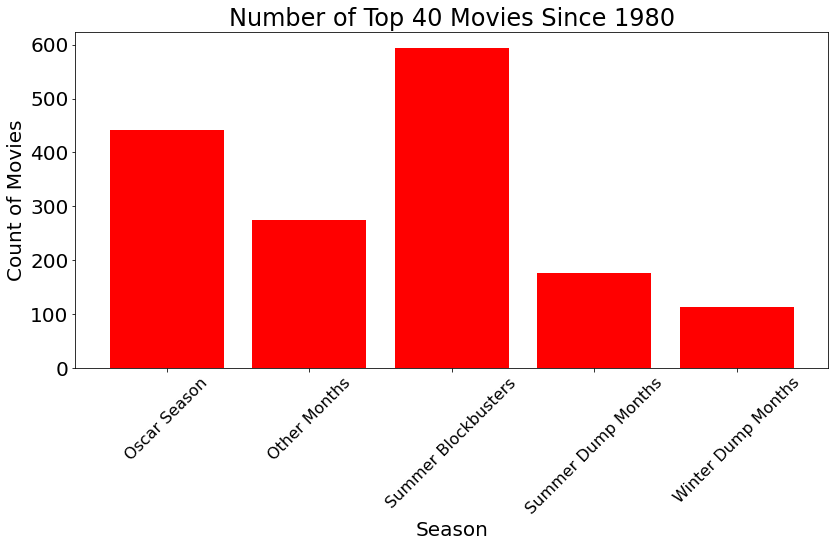

In [7]:
labels = ['Oscar Season', 'Other Months', 'Summer Blockbusters', 
          'Summer Dump Months', 'Winter Dump Months']
titlecount = Summary_df['Title']


x_axis = np.arange(len(labels))  # the label locations

plt.figure(figsize = (12, 8))
plt.rc('font', size=20)
plt.rc('xtick', labelsize=16)

plt.bar(x_axis, titlecount, color='r', align='center')

ticks = [value for value in x_axis]
plt.xticks(ticks, labels, rotation=45)

# Set textual properties
plt.title("Number of Top 40 Movies Since 1980")
plt.ylabel("Count of Movies")
plt.xlabel("Season")
plt.tight_layout()
plt.show()

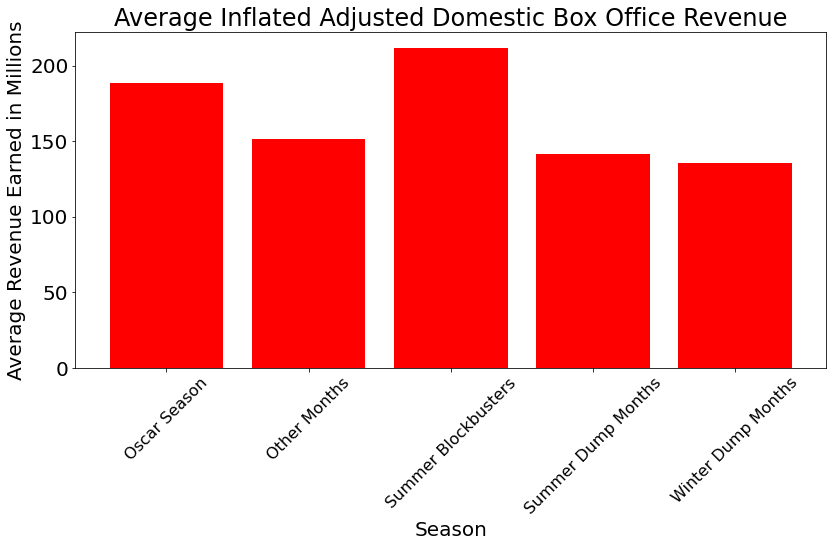

In [8]:
labels2 = ['Oscar Season', 'Other Months', 'Summer Blockbusters', 
          'Summer Dump Months', 'Winter Dump Months']
AveBox = Summary_df['Infl. Adj. Dom. Box Office']/1000000


x_axis2 = np.arange(len(labels2))  # the label locations

plt.figure(figsize = (12, 8))
plt.rc('font', size=20)
plt.rc('xtick', labelsize=16)

plt.bar(x_axis2, AveBox, color='r', align='center')

ticks = [value for value in x_axis2]
plt.xticks(ticks, labels, rotation=45)

# Set textual properties
plt.title("Average Inflated Adjusted Domestic Box Office Revenue")
plt.ylabel("Average Revenue Earned in Millions")
plt.xlabel("Season")
plt.tight_layout()
plt.show()


#figure out how to make this more readable. Y-Axis Sucks

In [9]:
#John's code ends here

In [10]:
#Jason's code starts here

In [11]:
SummData.head(5)

,Title,Domestic Release Date,Year Released (Domestic),Month Released (Domestic),Infl. Adj. Dom. Box Office,Domestic Box Office,Genre,Oscars Won,Number Oscars Won,Total Oscars Awarded in Year,Awards,Metascore,IMDB,Rotten Tomatoes,Rated,Director,Runtime,Theatrical Distributor,Country,Data Set
0,Titanic,1997-12-19,1997,12,1240601558,659363944,Thriller/Suspense,Yes,11,24,Won 11 Oscars. Another 113 wins & 83 nominations.,75.0,7.8,89%,PG-13,James Cameron,194 min,Paramount Pictures,"USA, Mexico, Australia, Canada",Oscar Season
1,ET: The Extra-Terrestrial,1982-06-11,1982,6,1224582698,435110554,Drama,Yes,4,23,Won 4 Oscars. Another 48 wins & 35 nominations.,91.0,7.8,98%,PG,Steven Spielberg,115 min,Universal,USA,Summer Blockbusters
2,Star Wars Ep. VII: The Force Awakens,2015-12-18,2015,12,1006872847,936662225,Adventure,No,0,25,Nominated for 5 Oscars. Another 62 wins & 126 ...,80.0,7.9,93%,PG-13,J.J. Abrams,138 min,Walt Disney,USA,Oscar Season
3,Avatar,2009-12-18,2009,12,899243135,760507625,Action,Yes,3,25,Won 3 Oscars. Another 86 wins & 129 nominations.,83.0,7.8,82%,PG-13,James Cameron,162 min,20th Century Fox,USA,Oscar Season
4,Star Wars Ep. V: The Empire Strikes Back,1980-05-21,1980,5,880005730,290271960,Adventure,Yes,1,22,Won 1 Oscar. Another 24 wins & 20 nominations.,82.0,8.7,94%,PG,Irvin Kershner,124 min,20th Century Fox,USA,Summer Blockbusters


In [12]:
analysis_box_office = SummData[["Year Released (Domestic)", "Infl. Adj. Dom. Box Office", "Data Set"]]
analysis_box_office.head()

,Year Released (Domestic),Infl. Adj. Dom. Box Office,Data Set
0,1997,1240601558,Oscar Season
1,1982,1224582698,Summer Blockbusters
2,2015,1006872847,Oscar Season
3,2009,899243135,Oscar Season
4,1980,880005730,Summer Blockbusters


In [13]:
summer_bb = analysis_box_office[["Infl. Adj. Dom. Box Office", "Data Set"]]
summer_bb.head()

,Infl. Adj. Dom. Box Office,Data Set
0,1240601558,Oscar Season
1,1224582698,Summer Blockbusters
2,1006872847,Oscar Season
3,899243135,Oscar Season
4,880005730,Summer Blockbusters


In [14]:
summerbb_df = summer_bb[summer_bb["Data Set"] == 'Summer Blockbusters']
summerbb_df = summerbb_df.rename(columns={"Data Set": "Release_Group",
                                            "Infl. Adj. Dom. Box Office": "Box_office"
                                      })
summerbb_df.head()

,Box_office,Release_Group
1,1224582698,Summer Blockbusters
4,880005730,Summer Blockbusters
6,847248129,Summer Blockbusters
7,836866856,Summer Blockbusters
8,827550405,Summer Blockbusters


In [15]:
not_summer_df = summer_bb[summer_bb["Data Set"] != 'Summer Blockbusters']
not_summer_df = not_summer_df.rename(columns={"Data Set": "Release_Group",
                                            "Infl. Adj. Dom. Box Office": "Box_office"
                                     })
not_summer_df.head()

,Box_office,Release_Group
0,1240601558,Oscar Season
2,1006872847,Oscar Season
3,899243135,Oscar Season
5,858373000,Other Months
14,700059566,Winter Dump Months


In [16]:
# Calculate Pvalue for Box office amounts using the t-test
sts.ttest_ind(summerbb_df.Box_office, not_summer_df.Box_office, equal_var=False)

Ttest_indResult(statistic=6.951498332742322, pvalue=6.513783348780751e-12)

### The pvalue is much lower than .05 so we reject the Null Hypothesis. 
* This demonstrates that the this occurring by chance is unlikely.
* We are confident that movies released between May and July make more money than movies released during other months.

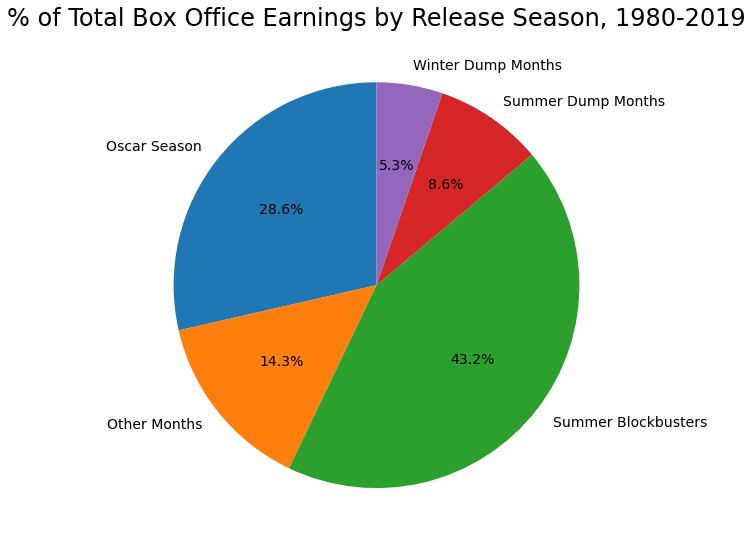

In [17]:
# Building Pie Chart on Box Office
pie_df = analysis_box_office[["Infl. Adj. Dom. Box Office", "Data Set"]]
pie_df.head()

grouped_by_group = pie_df.groupby(["Data Set"])
grouped_df = grouped_by_group["Infl. Adj. Dom. Box Office"].sum()

groups_cnts_df = pd.DataFrame({"Sums": grouped_df})

group_list = groups_cnts_df.keys()

plt.figure(figsize = (20, 20))

ax1 = plt.subplot(121, aspect='equal')
movie_pie = groups_cnts_df.plot(kind="pie", y=group_list[0], ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=14, 
 title=("% of Total Box Office Earnings by Release Season, 1980-2019"))
movie_pie.set_ylabel(None)

plt.show()

In [18]:
#Jason's code ends here

In [19]:
#Marianne's code starts here

![title](img/oscars.png)

## Hypothesis 2
* Hypothesis: The majority of Oscar winning movies are released during "Oscar Season" (November and December).
* Null Hypothesis: Oscar winners are released throughout the year equally.

### Related questions:
* Does box office success equate to more awards success? 
* Do viewer ratings correlate with oscar wins? 
* Do critic ratings correlate with oscar wins?


In [20]:
# Total Number of Oscars Won by Data Group (Time of Year) Bar Chart - Marianne


# SummData.head()

Oscar_Time_of_Year = SummData.groupby("Data Set").agg({"Data Set":"count","Number Oscars Won":"sum"})
Oscar_Time_of_Year.columns.values[0] = "Number of Movies"

allMovies = Oscar_Time_of_Year["Number of Movies"].sum()
allOscars = Oscar_Time_of_Year["Number Oscars Won"].sum()

Oscar_Time_of_Year["% of All Movies"] = Oscar_Time_of_Year["Number of Movies"] / allMovies * 100

Oscar_Time_of_Year["% of All Oscars"] = Oscar_Time_of_Year["Number Oscars Won"] / allOscars * 100


Oscar_Time_of_Year

,Number of Movies,Number Oscars Won,% of All Movies,% of All Oscars
Data Set,,,,
Oscar Season,441,303,27.5625,53.818828
Other Months,275,73,17.1875,12.966252
Summer Blockbusters,594,127,37.1250,22.557726
Summer Dump Months,177,46,11.0625,8.170515
Winter Dump Months,113,14,7.0625,2.486679


## When are the majority of Oscar winners released?

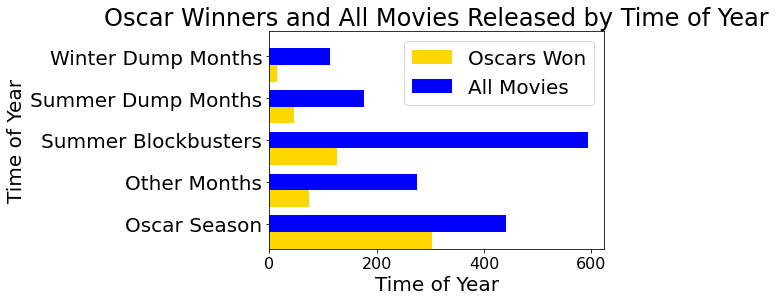

<Figure size 864x576 with 0 Axes>

In [21]:
ind = np.arange(len(Oscar_Time_of_Year))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, Oscar_Time_of_Year['Number Oscars Won'], width, color='gold', label='Oscars Won')
ax.barh(ind + width, Oscar_Time_of_Year['Number of Movies'], width, color='blue', label='All Movies')

ax.set(yticks=ind + width, yticklabels=Oscar_Time_of_Year.index.values, ylim=[2*width - 1, len(Oscar_Time_of_Year)])
ax.legend()
ax.set_title('Oscar Winners and All Movies Released by Time of Year')
plt.ylabel("Time of Year")
plt.xlabel("Time of Year")
plt.figure(figsize = (12, 8))
plt.rc('font', size=20)
plt.rc('xtick', labelsize=16)
plt.show()


The highest proportion of Oscars Won is from movies released during Oscar Season, however this doesn't really paint an accurate picture. Comparing the raw number of movies doesn't tell the whole story - seeing the relative proportion of movies in each category tells a better story. (See below.)

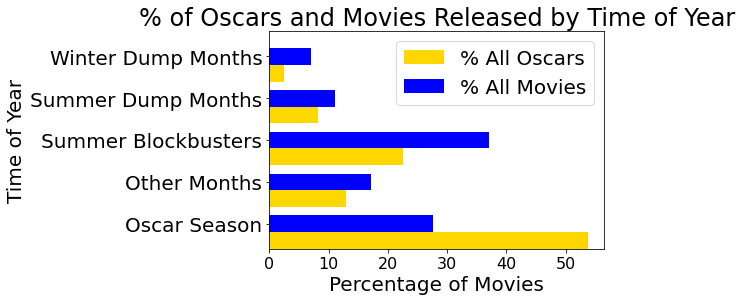

<Figure size 1152x1152 with 0 Axes>

In [22]:
ind = np.arange(len(Oscar_Time_of_Year))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, Oscar_Time_of_Year['% of All Oscars'], width, color='gold', label='% All Oscars')
ax.barh(ind + width, Oscar_Time_of_Year['% of All Movies'], width, color='blue', label='% All Movies')


ax.set(yticks=ind + width, yticklabels=Oscar_Time_of_Year.index.values, ylim=[2*width - 1, len(Oscar_Time_of_Year)])
ax.legend()
ax.set_title('% of Oscars and Movies Released by Time of Year')
plt.ylabel("Time of Year")
plt.xlabel("Percentage of Movies")
plt.figure(figsize = (16, 16))
plt.rc('font', size=20)
plt.rc('xtick', labelsize=16)
plt.show()

Comparing the percentages is a better way to see the picture of Oscar success based on time of year. 53.8% of all Oscar winners are released during Oscar season, but only 27.7% of all movies come out during that time of year, meaning movies released during Oscar season are far more likely to win awards. It's also interesting to note that, while Summer Blockbusters win fewer awards than we would expect if time of year didn't matter, it's the second most likely release timeframe for awards.

In [23]:
#marianne's code ends here

In [24]:
#jason's code starts here

In [25]:
analysis_oscars = SummData[["Number Oscars Won", "Data Set"]]
analysis_oscars.head(100)

,Number Oscars Won,Data Set
0,11,Oscar Season
1,4,Summer Blockbusters
2,0,Oscar Season
3,3,Oscar Season
4,1,Summer Blockbusters
...,...,...
95,0,Summer Blockbusters
96,0,Summer Blockbusters
97,4,Oscar Season
98,0,Summer Blockbusters


In [26]:
oscar_season_df = analysis_oscars[analysis_oscars["Data Set"] == 'Oscar Season']
oscar_season_df = oscar_season_df.rename(columns={"Data Set": "Release_Group",
                                            "Number Oscars Won": "Oscars"
                                      })
oscar_season_df.head()

,Oscars,Release_Group
0,11,Oscar Season
2,0,Oscar Season
3,3,Oscar Season
20,0,Oscar Season
22,0,Oscar Season


In [27]:
non_oscar_season_df = analysis_oscars[analysis_oscars["Data Set"] != 'Oscar Season']
non_oscar_season_df = non_oscar_season_df.rename(columns={"Data Set": "Release_Group",
                                            "Number Oscars Won": "Oscars"
                                      })
non_oscar_season_df.head()

,Oscars,Release_Group
1,4,Summer Blockbusters
4,1,Summer Blockbusters
5,0,Other Months
6,0,Summer Blockbusters
7,3,Summer Blockbusters


In [28]:
# Calculate Pvalue for Oscar Wins using the t-test
sts.ttest_ind(oscar_season_df.Oscars, non_oscar_season_df.Oscars, equal_var=False)

Ttest_indResult(statistic=5.779873658914818, pvalue=1.2834332139259976e-08)

### The pvalue is much lower than .05 so we reject the Null Hypothesis. 
* This demonstrates that the this occurring by chance is unlikely.
* We are confident that most Oscar winning movies are released during "Oscar Season" (November and December).

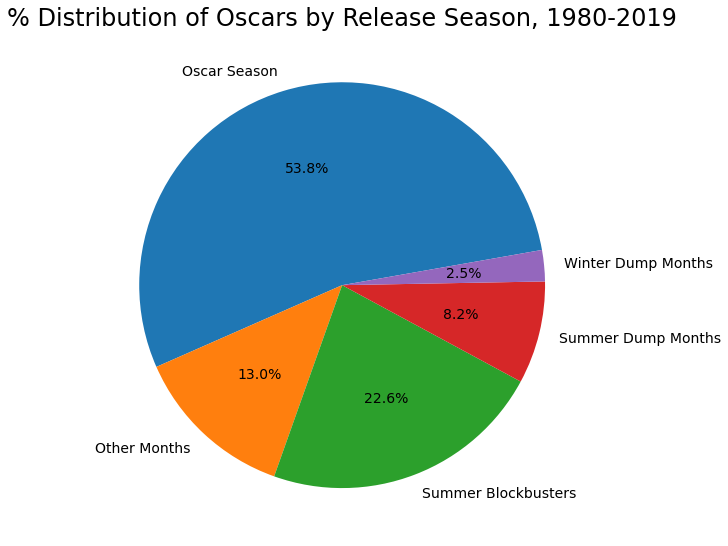

In [29]:
# Build a Pie Chart to convey the Oscars Distribution.
pie2_df = analysis_oscars[["Number Oscars Won", "Data Set"]]
pie2_df.head()

oscars_by_group = pie2_df.groupby(["Data Set"])
grouped_oscar_df = oscars_by_group["Number Oscars Won"].sum()

groups_oscar_cnts_df = pd.DataFrame({"Sums": grouped_oscar_df})

group_oscar_list = groups_oscar_cnts_df.keys()

plt.figure(figsize = (20, 20))

ax1 = plt.subplot(121, aspect='equal')
movie_oscar_pie = groups_oscar_cnts_df.plot(kind="pie", y=group_oscar_list[0], ax=ax1, autopct='%1.1f%%', 
 startangle=10, shadow=False, legend = False, fontsize=14, title=("% Distribution of Oscars by Release Season, 1980-2019"))
movie_oscar_pie.set_ylabel(None)

plt.show()

In [30]:
#jason's code ends here

In [31]:
#marianne's code starts here

## Do viewer ratings correlate with oscar wins?

The r-squared is: 0.14456398012742575


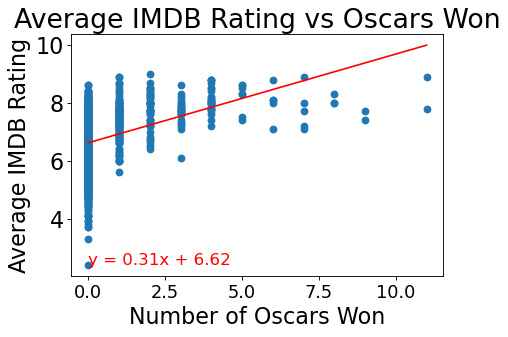

In [32]:
# Scatterplot of IMDB ratings vs. oscars won (for the top oscar winners) - with regression line - Marianne

x_values = SummData['Number Oscars Won']
y_values = SummData['IMDB']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#create plot
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#create line equation and annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")

#label the axes and create title
plt.xlabel("Number of Oscars Won")
plt.ylabel("Average IMDB Rating")
plt.title("Average IMDB Rating vs Oscars Won")

#calculate and print r squared to determine strength of correlation
print(f'The r-squared is: {rvalue**2}')

plt.show()

Based on the r-squared, there doesn't appear to be a strong correlation between awards won and viewer rating. While there aren't many movies winning Oscars with low ratings, there are numerous highly rated movies winning no Oscars.

## Do critic ratings correlate with oscar wins?

The r-squared is: 0.16771533938187957


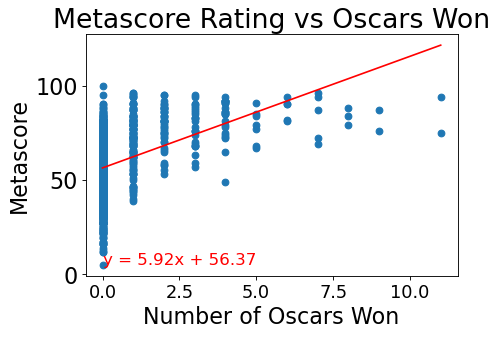

In [33]:
# Scatterplot of metaScore ratings vs. oscars won (for the top oscar winners) - with regression line - Marianne

metaScore = SummData.dropna(subset=['Metascore'])

x_values = metaScore['Number Oscars Won']
y_values = metaScore['Metascore']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#create plot
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#create line equation and annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")

#label the axes and create title
plt.xlabel("Number of Oscars Won")
plt.ylabel("Metascore")
plt.title("Metascore Rating vs Oscars Won")

#calculate and print r squared to determine strength of correlation
print(f'The r-squared is: {rvalue**2}')

plt.show()

With an r-squared of .168, there is little correlation between critical ratings and Oscar success. The reasons are similar to viewer scores: for every Oscar winner there are many more highly-reviewed movies with no awards.

## Does box office success equate to more awards success?

The r-squared is: 0.0546360783533967


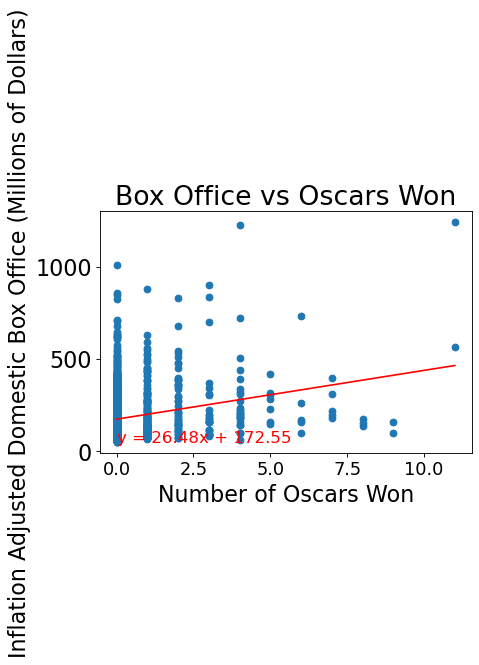

In [34]:
# Scatter Plot of box office vs number of oscars won

# Change Box Office format from exponent to integer
SummData['Infl. Adj. Dom. Box Office'] = SummData['Infl. Adj. Dom. Box Office'].astype('int64') / 1000000

x_values = SummData['Number Oscars Won']
y_values = SummData['Infl. Adj. Dom. Box Office']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#create plot
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#create line equation and annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")

#label the axes and create title
plt.xlabel("Number of Oscars Won")
plt.ylabel("Inflation Adjusted Domestic Box Office (Millions of Dollars)")
plt.title("Box Office vs Oscars Won")

#calculate and print r squared to determine strength of correlation
print(f'The r-squared is: {rvalue**2}')

plt.show()

An r-squared of .054 indicates no correlation between awards and box office success. It is possible that a dataset including more movies for each year may change this number, as we don't have the lowest box office numbers included in this analysis.

In [35]:
#Create the lists of box office values for the box plot

OscarsOnly_df = SummData.loc[SummData['Oscars Won'] == 'Yes'] #filter the dataframe to oscar winners

OscarMoney = OscarsOnly_df['Infl. Adj. Dom. Box Office']       #save the list of box office values of oscar winners


NoOscars_df = SummData.loc[SummData['Oscars Won'] == 'No']     #filter the dataframe to non-oscar winners
    
OscarlessMoney = NoOscars_df['Infl. Adj. Dom. Box Office']     #save the list of box office values of non-winners
    


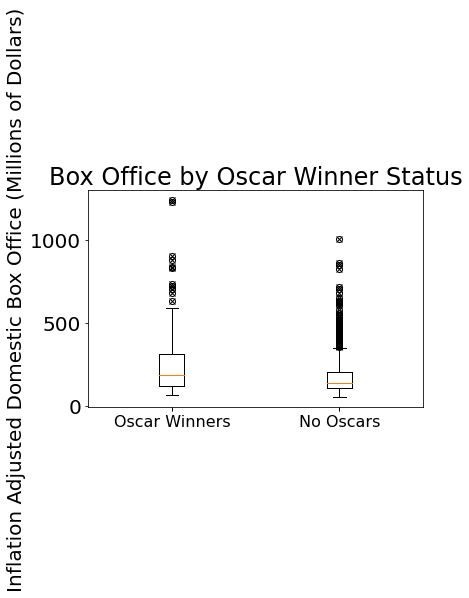

In [36]:
# Create a box plot comparing the box office of oscar winners vs. non winners

#Create the list of all movies
allMovies = [OscarMoney, OscarlessMoney]

#plot the data
fig, ax = plt.subplots()
ax.boxplot(allMovies)

# change outlier point symbols
ax.boxplot(allMovies, 0, 'x')

#label the graph
ax.set_xticklabels(['Oscar Winners', 'No Oscars'])
ax.set_ylabel('Inflation Adjusted Domestic Box Office (Millions of Dollars)')
ax.set_title('Box Office by Oscar Winner Status')

#look at adjusting values to remove exponent
# set yticks

plt.show()

On the other hand, based on this chart Oscar winners have a wider range of box office earnings, and on average tend to earn more money than non-winners. However, the large numbers of outliers in both datasets are what makes the correlation close to zero. It is possible a correlation may be stronger with more data on low box-office movies.

In [37]:
#Marianne's code ends here

<h2><center>Bonus analysis: Impact of genre on box office sales and awards</center></h2>

![title](img/titanic.png)
<center>You knew it was coming eventually</center>

In [38]:
#Nicole's code starts here

In [39]:
# Load cleaned data
FINAL_CLEANED_DF = pd.read_csv('DataFiles/FINAL_CLEANED_DF.csv')

In [40]:
# Account for NaN values in genre
FINAL_CLEANED_DF['Genre'] = FINAL_CLEANED_DF['Genre'].fillna('Unspecified')

In [41]:
# Create Dataframe & reformat for use in genre analysis

# Genre Groupby
genre_df = FINAL_CLEANED_DF.groupby('Genre').agg({'Genre':'count','Infl. Adj. Dom. Box Office':
                                                ['sum', 'mean'], 'Number Oscars Won': 'sum'})
# Genre DataFrame
genre_df.columns = ['# of Movies', 'Box Office Sum', 'Box Office Mean', 'Oscars Won']

# Reset index so genre turned into a column
genre_df = genre_df.reset_index()

# Change Oscars Won to integer
genre_df['Oscars Won'] = genre_df['Oscars Won'].astype(int)

# Change Box Office format from exponent to integer
genre_df['Box Office Mean'] = genre_df['Box Office Mean'].astype('int64')

# Display Genre DataFrame
genre_df

,Genre,# of Movies,Box Office Sum,Box Office Mean,Oscars Won
0,Action,316,64576076707,204354673,70
1,Adventure,353,82802756016,234568713,94
2,Black Comedy,6,793223752,132203958,0
3,Comedy,356,54249525224,152386306,30
4,Concert/Performance,2,224616570,112308285,0
5,Documentary,9,1303581229,144842358,1
6,Drama,255,39639071376,155447338,240
7,Horror,73,9309849450,127532184,11
8,Musical,32,5699421963,178106936,38
9,Romantic Comedy,60,9573574009,159559566,18


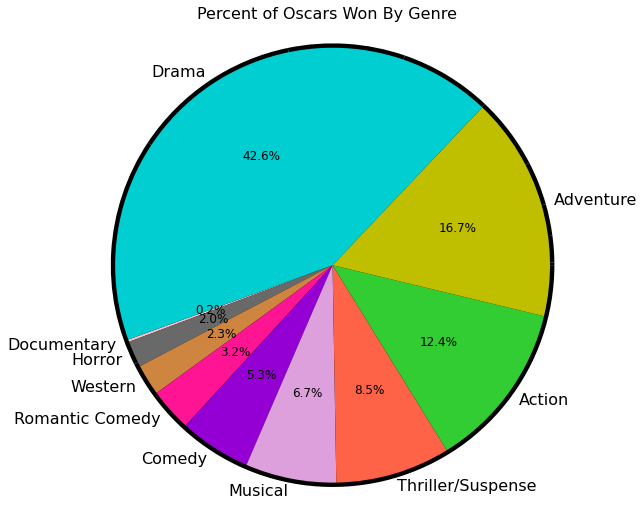

In [42]:
# Pie Chart of Oscars Won Per Genre

# Removing Zero Values to make plot look nicer
non_zero_values_df = genre_df.loc[(genre_df['Oscars Won'] > 0), :].sort_values('Oscars Won')

# Create Plot
oscars = non_zero_values_df['Oscars Won']
labels = non_zero_values_df['Genre']
plt.rc('font', size = 12)
colors = ['pink', 'dimgray', 'peru', 'deeppink', 'darkviolet', 'plum',
          'tomato', 'limegreen', 'y', 'darkturquoise']
fig, ax = plt.subplots()
ax.axis('equal')
pie = ax.pie(oscars, radius=2.55, colors=['k'])
pie2 = ax.pie(oscars, radius=2.5, labels = labels, labeldistance = 1.06, autopct = '%1.1f%%',
             startangle=200, colors = colors)
fig.suptitle('Percent of Oscars Won By Genre', fontsize=16, y= 1.4)

plt.show()

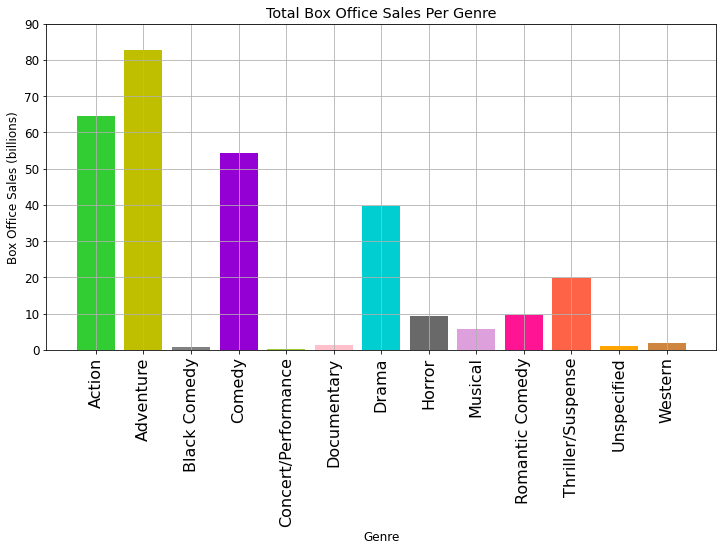

In [43]:
# Bar Chart of Total Box Office Sales Per Genre
revenue = genre_df['Box Office Sum']
genre = genre_df['Genre']
colors = ['limegreen', 'y', 'gray', 'darkviolet', 'yellowgreen', 'pink',
          'darkturquoise', 'dimgray', 'plum', 'deeppink', 'tomato', 'orange', 'peru']
plt.figure(figsize = (12,6))
plt.bar(genre, revenue, color = colors)
yticks = np.arange(0, 100000000000, 10000000000)
ylabels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.yticks(ticks = yticks, labels = ylabels)
plt.xticks(rotation = 90)
plt.title("Total Box Office Sales Per Genre")
plt.xlabel('Genre')
plt.ylabel('Box Office Sales (billions)')
plt.grid()
plt.show()

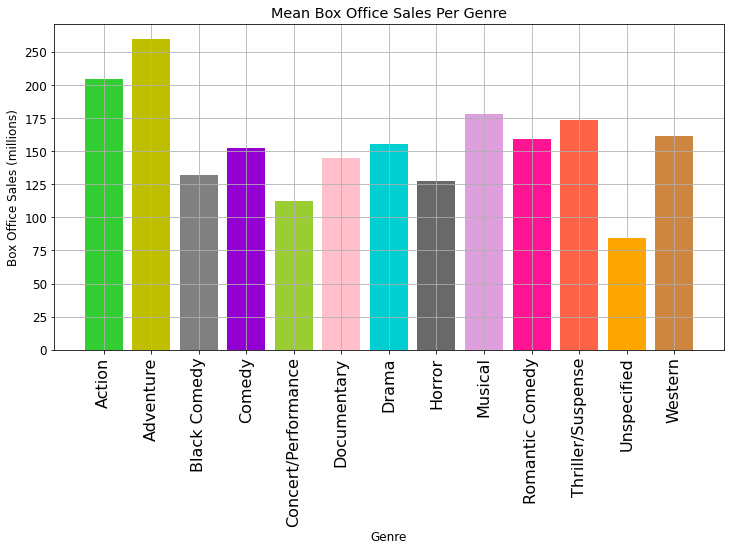

In [44]:
# Bar Chart of Mean Box Office Sales Per Genre
revenue = genre_df['Box Office Mean']
genre = genre_df['Genre']
plt.figure(figsize = (12,6))
plt.bar(genre, revenue, color = colors)
yticks = np.arange(0, 250000000, 25000000)
ylabels = [0, 25, 50, 75, 100, 125, 150, 175, 200, 250]
plt.yticks(ticks = yticks, labels = ylabels)
plt.xticks(rotation = 90)
plt.title('Mean Box Office Sales Per Genre')
plt.xlabel('Genre')
plt.ylabel('Box Office Sales (millions)')
plt.rc('xtick' , labelsize = 14)
plt.grid()
plt.show()

## Win that fictitious Netflix subscription!
* Guess the top 5 box office movies in the last 40 years
* Guess the 3 movies that have won the most Academy Awards (tying for 11). *Hint: One was before 1980.*

In [45]:
# Create DF to display top five movies
top_five = FINAL_CLEANED_DF[['Title', 'Domestic Release Date', 'Infl. Adj. Dom. Box Office',
                             'Domestic Box Office', 'Metascore', 'IMDB']]
top_five.columns = ['Movie', 'Release Date', 'Box Office (Adjusted)', 'Box Office', 'Metascore', 'IMDB Rating']
top_five['Box Office (Adjusted)'] = top_five['Box Office (Adjusted)'].map('${:,.0f}'.format)
top_five['Box Office'] = top_five['Box Office'].map('${:,.0f}'.format)
top_five['Metascore'] = top_five['Metascore'].map('{:.0f}'.format)
top_five = top_five.set_index('Movie')

In [46]:
# Display Top Five Movies (uncomment)
top_five.head(5)

,Release Date,Box Office (Adjusted),Box Office,Metascore,IMDB Rating
Movie,,,,,
Titanic,1997-12-19,"$1,240,601,558","$659,363,944",75,7.8
ET: The Extra-Terrestrial,1982-06-11,"$1,224,582,698","$435,110,554",91,7.8
Star Wars Ep. VII: The Force Awakens,2015-12-18,"$1,006,872,847","$936,662,225",80,7.9
Avatar,2009-12-18,"$899,243,135","$760,507,625",83,7.8
Star Wars Ep. V: The Empire Strikes Back,1980-05-21,"$880,005,730","$290,271,960",82,8.7


In [47]:
# Create DF to display most oscar wins
top_oscars = FINAL_CLEANED_DF[['Title', 'Domestic Release Date', 'Number Oscars Won', 'Infl. Adj. Dom. Box Office',
                             'Domestic Box Office', 'Metascore', 'IMDB']].sort_values('Number Oscars Won', ascending = False)
top_oscars.columns = ['Movie', 'Release Date', 'Oscars', 'Box Office (Adjusted)', 'Box Office', 'Metascore', 'IMDB Rating']
top_oscars['Box Office (Adjusted)'] = top_oscars['Box Office (Adjusted)'].map('${:,.0f}'.format)
top_oscars['Box Office'] = top_oscars['Box Office'].map('${:,.0f}'.format)
top_oscars['Metascore'] = top_oscars['Metascore'].map('{:.0f}'.format)
top_oscars['Oscars'] = top_oscars['Oscars'].map('{:.0f}'.format)
top_oscars = top_oscars.set_index('Movie')

In [48]:
# Display Top Oscars (uncomment)
top_oscars.head(2)

,Release Date,Oscars,Box Office (Adjusted),Box Office,Metascore,IMDB Rating
Movie,,,,,,
Titanic,1997-12-19,11,"$1,240,601,558","$659,363,944",75,7.8
The Lord of the Rings: The Return of …,2003-12-17,11,"$566,753,142","$377,845,905",94,8.9


In [49]:
# Jerry Maquire facts
print("""
Jerry Maquire Facts:
• Release Date: 1996-12-13
• Adjusted Box office earnings: $311,919,057
• Ranking: 186
• Genre: Romantic Comedy
• Oscars Won: 1
• Metascore: 77
• IMDB Rating: 7.3'
""")


Jerry Maquire Facts:
• Release Date: 1996-12-13
• Adjusted Box office earnings: $311,919,057
• Ranking: 186
• Genre: Romantic Comedy
• Oscars Won: 1
• Metascore: 77
• IMDB Rating: 7.3'



In [50]:
#Nicole's code ends here